**Background**

This competition is designed to help you get started with DataCamp Competitions and familiarize yourself with how competitions work. You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area. You’ve recently learned data manipulation and plotting, and are helping your colleague analyze past sales data. **Your colleague wants to capture sales by payment method**. **She also needs to know the average unit price for each product line.**

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

### Importing necessary modules

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Reading the dataset

In [14]:
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])
df

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card
...,...,...,...,...,...,...,...,...
995,2021-08-28,Central,Retail,Electrical system,9,32.87,295.83,Credit card
996,2021-08-28,West,Wholesale,Breaking system,32,10.03,320.96,Transfer
997,2021-08-28,West,Wholesale,Electrical system,12,32.80,393.64,Transfer
998,2021-08-28,North,Retail,Frame & body,5,48.25,241.23,Cash


### Exploring the dataset

1) Checking for duplicate values
2) Shape of the data
3) Null values
4) Correlation between the fields
5) Data types

In [4]:
df.shape

## 1000 rows with 8 columns

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [6]:
df.isna().sum()

## No null values detected

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

In [51]:
df.corr()

## High correlation between the quantity and total sales.
## High correlation between the unit price and total sales.

## A pairplot is shown below to show the correlation better.

,quantity,unit_price,total
quantity,1.000000,0.035822,0.870207
unit_price,0.035822,1.000000,0.372942
total,0.870207,0.372942,1.000000


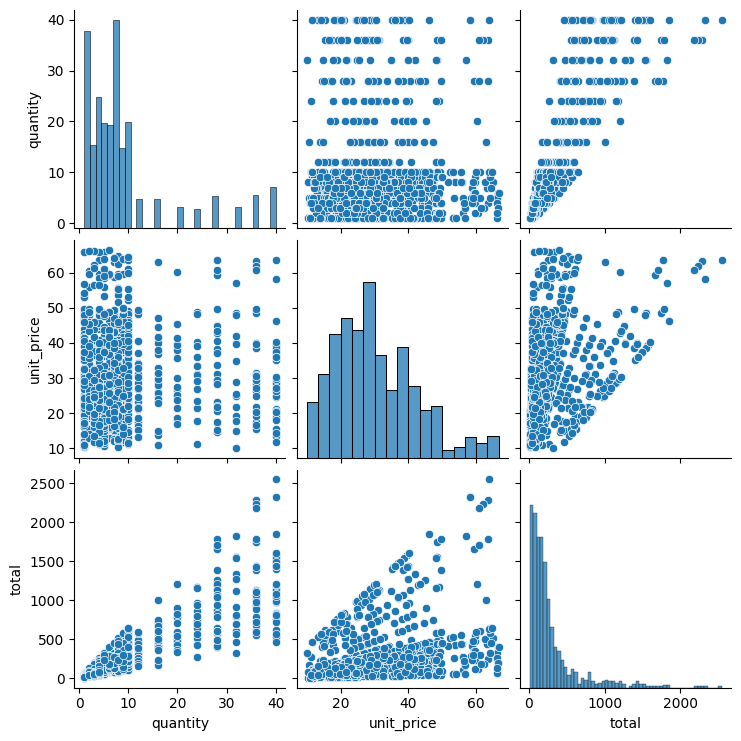

In [23]:
sns.pairplot(data = df)

### Q1. What are the total sales for each payment method?

In [12]:
Total = df.groupby('payment')['total'].sum().reset_index()
Total.sort_values('total', ascending = False)

,payment,total
2,Transfer,159642.33
1,Credit card,110271.57
0,Cash,19199.10


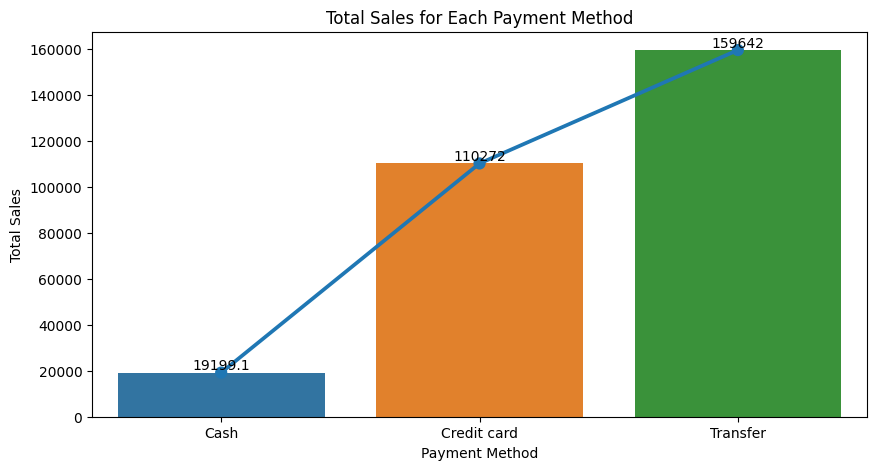

In [52]:
plt.figure(figsize = (10,5))
x = Total['payment']
y = Total['total']
bar1 = sns.barplot(x=x,y=y)
bar1.bar_label(bar1.containers[0])
sns.pointplot(x=x, y=y)
plt.title('Total Sales for Each Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()

Result Observation:

1) The Transfer payment method has the highest total sales (159642.33), with Credit card as the second (110271.57) and Cash as the last (19199.10)

### Q2. What is the average unit price for each product line?

In [22]:
avg_unit_price = df.groupby('product_line')['unit_price'].mean().reset_index()
avg_unit_price.sort_values('unit_price',ascending = False)

,product_line,unit_price
2,Engine,60.091803
3,Frame & body,42.832229
5,Suspension & traction,33.969868
1,Electrical system,25.585130
4,Miscellaneous,22.810738
0,Breaking system,17.740522


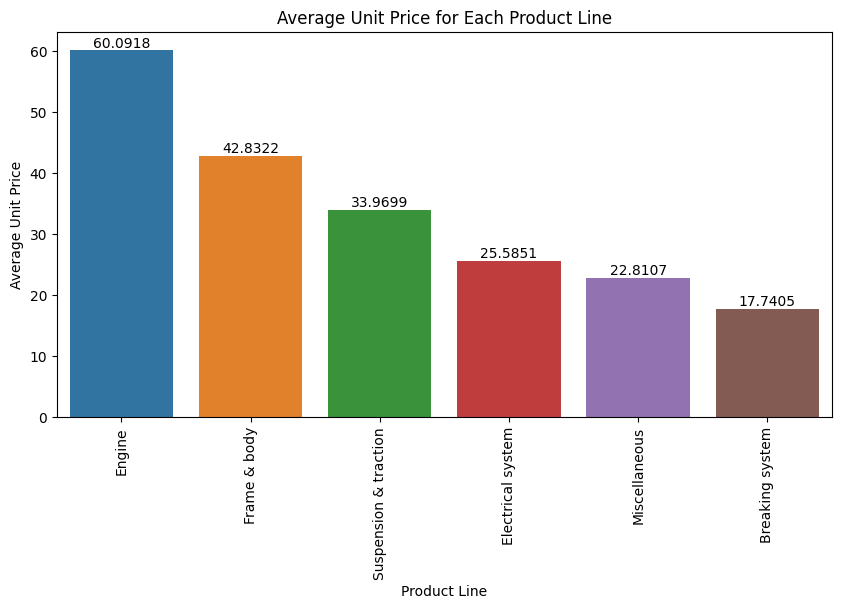

In [58]:
avg_unit_price = avg_unit_price.sort_values('unit_price', ascending = False)

plt.figure(figsize = (10,5))
x = avg_unit_price['product_line']
y = avg_unit_price['unit_price']
bar = sns.barplot(x=x,y=y)
bar.bar_label(bar.containers[0])
plt.title('Average Unit Price for Each Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Unit Price')
plt.xticks(rotation = 90)
plt.show()

Result observation:

1) The 'Engine' product line has a higher mean unit price compared to the rest of the other product lines (60.09).
2) Breaking system product line has the lowest mean unit price.


### Q3. Whats the average purchase value by client type?

In [41]:
avg_purc_val = df.groupby('client_type')['total'].mean().reset_index()
avg_purc_val

,client_type,total
0,Retail,167.058929
1,Wholesale,709.521467


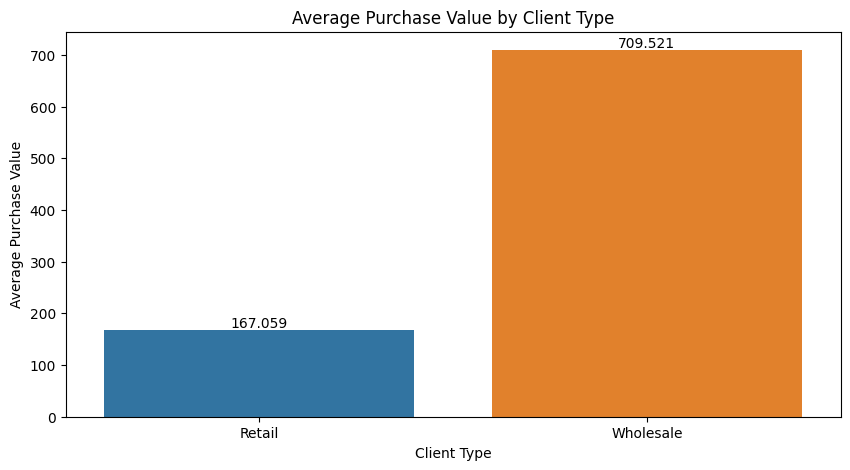

In [53]:
plt.figure(figsize = (10,5))
x = avg_purc_val['client_type']
y = avg_purc_val['total']
bar2 = sns.barplot(x=x,y=y)
bar2.bar_label(bar2.containers[0])
plt.title('Average Purchase Value by Client Type')
plt.xlabel('Client Type')
plt.ylabel('Average Purchase Value')
plt.show()

Result Observation:

Observing a average purchase value of 167.06 for Retail, and 709.52 for Wholesale. This makes the average unit price for wholesale client type higher.

### Q4. Whats the total purchase value by product line?

In [48]:
tot = df.groupby('product_line')['total'].sum().reset_index()
tot

,product_line,total
0,Breaking system,38350.15
1,Electrical system,43612.71
2,Engine,37945.38
3,Frame & body,69024.73
4,Miscellaneous,27165.82
5,Suspension & traction,73014.21


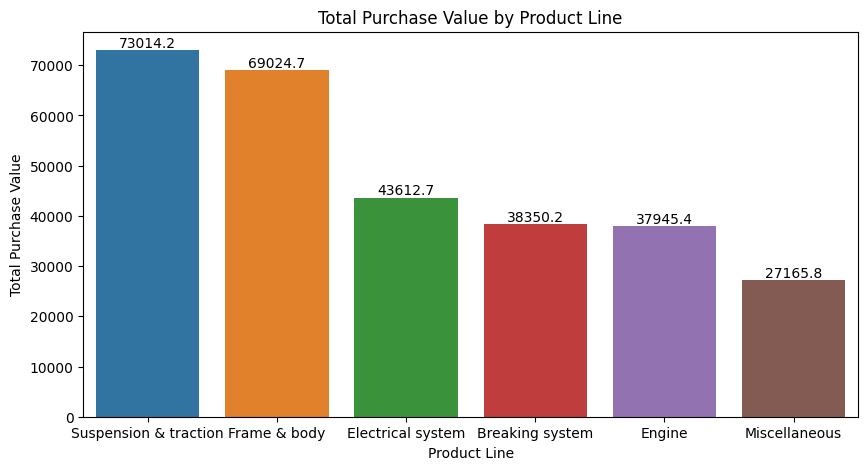

In [57]:
tot = tot.sort_values('total', ascending = False)

plt.figure(figsize = (10,5))
x = tot['product_line']
y = tot['total']
bar4 = sns.barplot(x=x,y=y)
bar4.bar_label(bar4.containers[0])
plt.title('Total Purchase Value by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Purchase Value')
plt.show()

Result Observation:

1) Frame and body products has the highest total purchase value, with miscellaneous products having the lowest purchase value.

### Summary of Results

1) The Transfer payment method has the highest total sales (159642.33) amongst the other payment methods used.
2) The 'Engine' product line has a higher mean unit price compared to the rest of the other product lines (60.09).
3) 'Breaking system' product line has the lowest mean unit price.
4) The average unit price for 'wholesale' client type higher compared to retail.
5) 'Frame and body' products has the highest total purchase value, with 'miscellaneous' products having the lowest purchase value.

Conclusion: 
- The 'Transfer' payment method lands the highest total sales for the company.

- The average unit price for each product line are:


	a) Engine = 60.09 (Highest)
    
    b) Frame and Body = 42.83
    
    c) Suspension and Traction = 33.97
    
    d) Electrical System = 25.59
    
    e) Miscellaneous = 22.81
    
    f) breaking Systems = 17.74 (Lowest)